In [1]:
from Bio.PDB import PDBParser
parser = PDBParser()
import os
import prody
import pandas as pd
import freesasa
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import traceback

In [2]:
sns.set_context("talk")
plt.rcParams['font.family'] ="Arial"
plt.rcParams['pdf.fonttype'] = 'truetype'

In [8]:
seq_data = pd.read_excel("SARS2_Nbs.xlsx")
seq_data_pan = pd.read_excel("SARS2_PanNbs.xlsx")

In [4]:
Nb_area = []
name1 =[]

for idx,row in seq_data.iterrows():
    try:
        pdb = row['pdb']
        name = row['Name']
        VH_chain = row['VH Chain']
        Ag_chain = row['RBD Chain']
        
        VH_Ag_chains = f'chain {VH_chain} {Ag_chain}'
        VH_chain = f'chain {VH_chain}'
        Ag_chain = f'chain {Ag_chain}'
        
        filename = os.path.join("Nbs",f"{pdb.lower()}.pdb")
        
        struct = prody.parsePDB(filename)
        
#         complex_strcture = freesasa.Structure(filename)
#         complex_structure_result = freesasa.calc(complex_strcture)
        
#         VH_area_complex = freesasa.selectArea([f"s1,chain {Nb_chain}"],complex_strcture,complex_structure_result)['s1']

#         VH_chain = struct.select(f"chain {Nb_chain}").copy()
        
#         prody.writePDB(f"BuriedArea/{pdb}_Nb_H.pdb",VH_chain)
        
#         H_chain_structure = freesasa.Structure(f"BuriedArea/{pdb}_Nb_H.pdb")
#         VH_area_tot = freesasa.calc(H_chain_structure).totalArea()


#         BuriedArea = VH_area_tot-VH_area_complex

        strcut_RBD    = struct.select(Ag_chain).copy()
        struct_RBD_VH = struct.select(VH_Ag_chains).copy()
        strcut_VH    = struct.select(VH_chain).copy()
        prody.writePDB(f"BuriedArea/annotated_{pdb}_A.pdb",strcut_RBD)
        prody.writePDB(f"BuriedArea/annotated_{pdb}_A_H.pdb",struct_RBD_VH)
        prody.writePDB(f"BuriedArea/annotated_{pdb}_H.pdb",strcut_VH)

        RBD_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_A.pdb")
        RBD_apo_area = freesasa.calc(RBD_struct).totalArea()

        VH_apo_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_H.pdb")
        VH_apo_area = freesasa.calc(VH_apo_struct).totalArea()

        VH_bound_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_A_H.pdb")
        VH_bound_area = freesasa.calc(VH_bound_struct).totalArea()

        VH_buried = (RBD_apo_area+VH_apo_area-VH_bound_area)/2
            #name2.append(name)
        
        #print(f'{name}:{VH_area_tot}-{VH_area_complex}')
        Nb_area.append(VH_buried)
        name1.append(name)
    except Exception as e:
        print(f"sth wrong with {pdb}")
        print(traceback.print_exc())

@> 2852 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 176 residues.
@> 5111 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 180 residues.
@> 3770 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 252 residues.
@> 2760 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Secondary structures were assigned to 170 residues.
@> 15699 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> Secondary structures were assigned to 1076 residues.
@> 3770 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 252 residues.
@> 2519 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 169 residues.
@> 4889 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> Secondary structures were assigned to 284 residues.
@> 53064 atoms and 1 coordinate set(s) were parsed in 0.54s.
@> Secondary stru

In [9]:
Pan_Nb_area = []
pan_name1 =[]

for idx,row in seq_data_pan.iterrows():
    try:
        pdb = row['pdb']
        name = row['Name']
        VH_chain = row['VH Chain']
        Ag_chain = row['RBD Chain']
        filename = os.path.join("Nbs",f"{pdb.lower()}")
        VH_Ag_chains = f'chain {VH_chain} {Ag_chain}'
        VH_chain = f'chain {VH_chain}'
        Ag_chain = f'chain {Ag_chain}'
        
        filename = os.path.join("Nbs",f"{pdb.lower()}")
        
        struct_RBD_VHL= prody.parsePDB(filename)
        
        strcut_RBD    = struct_RBD_VHL.select(Ag_chain).copy()
        struct_RBD_VH = struct_RBD_VHL.select(VH_Ag_chains).copy()
        strcut_VH    = struct_RBD_VHL.select(VH_chain).copy()
        prody.writePDB(f"BuriedArea/annotated_{pdb}_A.pdb",strcut_RBD)
        prody.writePDB(f"BuriedArea/annotated_{pdb}_A_H.pdb",struct_RBD_VH)
        prody.writePDB(f"BuriedArea/annotated_{pdb}_H.pdb",strcut_VH)

        RBD_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_A.pdb")
        RBD_apo_area = freesasa.calc(RBD_struct).totalArea()

        VH_apo_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_H.pdb")
        VH_apo_area = freesasa.calc(VH_apo_struct).totalArea()

        VH_bound_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_A_H.pdb")
        VH_bound_area = freesasa.calc(VH_bound_struct).totalArea()
        print(name)
        print(f"{RBD_apo_area},{VH_apo_area},{VH_bound_area}")
        VH_buried = (RBD_apo_area+VH_apo_area-VH_bound_area)/2
        
        Pan_Nb_area.append(VH_buried)
        pan_name1.append(name)
    except Exception as e:
        print(f"sth wrong with {pdb}")
        print(traceback.print_exc())

@> 4950 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 103 residues.
@> 4895 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 137 residues.


5p182
10980.753191038491,6788.340753679161,16449.15368013941


@> 2751 atoms and 1 coordinate set(s) were parsed in 0.04s.


4p74
11087.245043957675,6604.526075161074,16207.06049846071


@> 2470 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Secondary structures were assigned to 136 residues.


Nb117
10077.685869810242,6199.549508019335,14944.273100900566


@> 4964 atoms and 1 coordinate set(s) were parsed in 0.05s.


5p38
10284.785715389795,6393.139828467808,15539.022653187032


@> 3480 atoms and 1 coordinate set(s) were parsed in 0.03s.


5p60
10415.63446383517,6468.241524755075,15262.230880945408


@> 2518 atoms and 1 coordinate set(s) were parsed in 0.04s.


5p35
10888.218507609936,6949.8207935259625,16568.212538985128


@> 4969 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 98 residues.


5p118
10049.103117897917,6104.623762604543,14674.941948332767


@> 2458 atoms and 1 coordinate set(s) were parsed in 0.02s.


5p93
10719.785338485692,6775.558569436359,16229.96151670374


@> 2438 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 134 residues.


4p56
10605.36349275978,6549.283273861441,15953.549913334735


@> 4858 atoms and 1 coordinate set(s) were parsed in 0.05s.


5p132
10614.425213739496,6421.34760066651,15446.910855783488


@> 2427 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> Secondary structures were assigned to 117 residues.


Nb113
10589.936455029534,6729.174601014233,15849.999358503213


@> 4914 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 88 residues.


5p179
9455.715226727481,6053.405992442459,14669.773801979007


@> 4918 atoms and 1 coordinate set(s) were parsed in 0.05s.


5p64
10893.23743469216,6616.244759147303,16118.260665971464
5p182_old
10582.073945417033,6120.087557872787,16060.696453969687


In [11]:
#Nb_area = pd.DataFrame({"Name":name1,'BuriedArea':Nb_area})
#Nb_area['RBS'] = Nb_area['Name'].apply(lambda x: Nb_class[x])
Pan_Nb_area = pd.DataFrame({"Name":pan_name1,'BuriedArea':Pan_Nb_area})

In [12]:
Pan_Nb_area

,Name,BuriedArea
0,5p182,659.970132
1,4p74,742.355310
2,Nb117,666.481138
3,5p38,569.451445
4,5p60,810.822554
5,5p35,634.913381
6,5p118,739.392466
7,5p93,632.691196
8,4p56,600.548427
9,5p132,794.430979


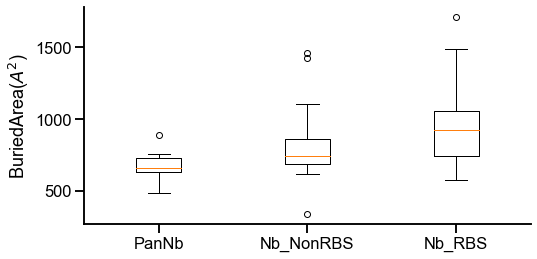

In [39]:
plt.figure(figsize=(8,4))
plt.boxplot([list(Pan_Nb_area['BuriedArea']),list(Nb_area[Nb_area['RBS']!=1]['BuriedArea']),list(Nb_area[Nb_area['RBS']==1]['BuriedArea'])])
plt.xticks([1,2,3],['PanNb','Nb_NonRBS','Nb_RBS'])
plt.ylabel("BuriedArea($A^2$)")
sns.despine()

In [10]:
pd.concat([Nb_area,Pan_Nb_area]).to_csv("BuriedArea.csv")

In [83]:
seq_data_Ab = pd.read_excel("SARS2_Abs.xlsx")

In [46]:
seq_data_Ab.columns

Index(['Name', 'Ab or Nb', 'Binds to', 'Doesn't Bind to', 'Neutralising Vs',
       'Not Neutralising Vs', 'Protein + Epitope', 'Origin', 'VH or VHH', 'VL',
       'Heavy V Gene', 'Heavy J Gene', 'Light V Gene', 'Light J Gene', 'CDRH3',
       'CDRL3', 'Structures', 'Sources', 'Date Added', 'Last Updated',
       'Update Description', 'Notes/Following Up?', 'Species', 'Pan', 'pdb'],
      dtype='object')

In [107]:

AbHL_area=[]
AbH_area=[]
AbL_area=[]

name2 =[]


for idx,row in seq_data_Ab.iterrows():
    
    pdb = row['pdb']
    name = row['Name']
    filename = os.path.join("Abs",f"{pdb.lower()}.pdb")
    VH_chain = row['VH chain']
    VL_chain = row['VL chain']
    Ag_chain = row['RBD chain']
    Ab_Ag_chains = f'chain {VH_chain} {VL_chain} {Ag_chain}'
    VH_Ag_chains = f'chain {VH_chain} {Ag_chain}'
    VL_Ag_chains = f'chain {VL_chain} {Ag_chain}'
    Ab_chains = f'chain {VH_chain} {VL_chain}'
    VH_chain = f'chain {VH_chain}'
    VL_chain = f'chain {VL_chain}'
    Ag_chain = f'chain {Ag_chain}'
    print(name)
    print(f'{Ag_chain}-{VH_chain}-{VL_chain}')
    
    struct_RBD_VHL = prody.parsePDB(filename)
    
    strcut_RBD    = struct_RBD_VHL.select(Ag_chain).copy()
    strcut_VHL    = struct_RBD_VHL.select(Ab_chains).copy()
    struct_RBD_VHL = struct_RBD_VHL.select(Ab_Ag_chains).copy()
    struct_RBD_VH = struct_RBD_VHL.select(VH_Ag_chains).copy()
    struct_RBD_VL = struct_RBD_VHL.select(VL_Ag_chains).copy()
    strcut_VH    = struct_RBD_VHL.select(VH_chain).copy()
    struct_VL = struct_RBD_VHL.select(VL_chain).copy()
    prody.writePDB(f"BuriedArea/annotated_{pdb}_A.pdb",strcut_RBD)
    prody.writePDB(f"BuriedArea/annotated_{pdb}_HL.pdb",strcut_VHL)
    prody.writePDB(f"BuriedArea/annotated_{pdb}_A_HL.pdb",struct_RBD_VHL)
    prody.writePDB(f"BuriedArea/annotated_{pdb}_A_H.pdb",struct_RBD_VH)
    prody.writePDB(f"BuriedArea/annotated_{pdb}_A_L.pdb",struct_RBD_VL)
    prody.writePDB(f"BuriedArea/annotated_{pdb}_H.pdb",strcut_VH)
    prody.writePDB(f"BuriedArea/annotated_{pdb}_L.pdb",struct_VL)

    RBD_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_A.pdb")
    RBD_apo_area = freesasa.calc(RBD_struct).totalArea()

    VH_apo_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_H.pdb")
    VH_apo_area = freesasa.calc(VH_apo_struct).totalArea()
    
    VL_apo_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_L.pdb")
    VL_apo_area = freesasa.calc(VL_apo_struct).totalArea()
    
    
    VHL_apo_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_HL.pdb")
    VHL_apo_area = freesasa.calc(VHL_apo_struct).totalArea()

    VHL_bound_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_A_HL.pdb")
    VHL_bound_area = freesasa.calc(VHL_bound_struct).totalArea()
    
    VH_bound_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_A_H.pdb")
    VH_bound_area = freesasa.calc(VH_bound_struct).totalArea()
    
    VL_bound_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_A_L.pdb")
    VL_bound_area = freesasa.calc(VL_bound_struct).totalArea()

    VHL_buried = (RBD_apo_area+VHL_apo_area-VHL_bound_area)/2
    AbHL_area.append(VHL_buried)
    #name2.append(name)
    
    VH_buried = (RBD_apo_area+VH_apo_area-VH_bound_area)/2
    AbH_area.append(VH_buried)
    #name2.append(name)
    
    VL_buried = (RBD_apo_area+VL_apo_area-VL_bound_area)/2
    AbL_area.append(VL_buried)
    name2.append(name)
    
    print(f"{name}:{RBD_apo_area:.2f}+{VHL_apo_area:.2f}-{VHL_bound_area:.2f} = {VHL_buried:.2f}")
    print(f"{name}:{RBD_apo_area:.2f}+{VH_apo_area:.2f}-{VH_bound_area:.2f} = {VH_buried:.2f}")
    print(f"{name}:{RBD_apo_area:.2f}+{VL_apo_area:.2f}-{VL_bound_area:.2f} = {VL_buried:.2f}")
# for pdb in Ab_set['name']:
#     try:
#         filename = f"annotated_{pdb}.pdb"
        
#         struct_RBD_VHL = prody.parsePDB(f'Abs/{filename}')
#         print(struct_RBD_VHL)
        
#         strcut_RBD    = struct_RBD_VHL.select(Ab_chains).copy()
#         strcut_VHL    = struct_RBD_VHL.select(Ag_struct).copy()
#         prody.writePDB(f"BuriedArea/annotated_{pdb}_A.pdb",strcut_RBD)
#         prody.writePDB(f"BuriedArea/annotated_{pdb}_HL.pdb",strcut_VHL)
        
#         RBD_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_A.pdb")
#         RBD_apo_area = freesasa.calc(RBD_struct).totalArea()

        
#         VHL_apo_struct = freesasa.Structure(f"BuriedArea/annotated_{pdb}_HL.pdb")
#         VHL_apo_area = freesasa.calc(VHL_apo_struct).totalArea()
        
#         VHL_bound_struct = freesasa.Structure(f"Abs/{filename}")
#         VHL_bound_area = freesasa.calc(VHL_bound_struct).totalArea()
        
# #         print("RBD_APO\tVH/VL\tBound")
# #         print(f"{RBD_apo_area}\t{VH_apo_area}\t{VH_bound_area}")
# #         print(f"{RBD_apo_area}\t{VL_apo_area}\t{VL_bound_area}")
# #         print(f"{RBD_apo_area}\t{VHL_apo_area}\t{VHL_bound_area}")

#         VHL_buried = (RBD_apo_area+VHL_apo_area-VHL_bound_area)/2
        

#         AbH_area.append(VH_buried)
#         AbL_area.append(VL_buried)
        
#         name2.append(filename)
#     except Exception as e:
#         print(f"sth wrong with {pdb}")
#         print(traceback.print_exc())

@> 4936 atoms and 1 coordinate set(s) were parsed in 0.05s.


CR3022
chain C-chain H-chain L
CR3022:10502.77+20193.01-28718.55 = 988.61
CR3022:10502.77+11845.36-21141.54 = 603.30
CR3022:10502.77+12091.52-21737.35 = 428.47
S309
chain A-chain H-chain L


@> 28116 atoms and 1 coordinate set(s) were parsed in 0.22s.
@> 9584 atoms and 1 coordinate set(s) were parsed in 0.08s.


S309:48291.65+10159.08-56897.25 = 776.74
S309:48291.65+6384.80-53387.35 = 644.55
S309:48291.65+5217.49-53132.82 = 188.16
CC12.1
chain A-chain H-chain L


@> 10309 atoms and 1 coordinate set(s) were parsed in 0.09s.


CC12.1:10104.08+18895.31-26362.32 = 1318.53
CC12.1:10104.08+11168.33-19668.53 = 801.94
CC12.1:10104.08+11332.25-20259.59 = 588.37
CC12.3
chain A-chain H-chain L
CC12.3:10927.52+19774.80-28929.74 = 886.29
CC12.3:10927.52+11709.44-21229.68 = 703.64
CC12.3:10927.52+11434.02-21996.24 = 182.65
C105
chain C-chain H-chain L


@> 26760 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> Secondary structures were assigned to 1577 residues.
@> 7998 atoms and 1 coordinate set(s) were parsed in 0.07s.


C105:50432.09+9904.59-58524.34 = 906.17
C105:50432.09+6019.04-55117.31 = 666.91
C105:50432.09+5752.24-55648.56 = 267.88
REGN10933
chain E-chain B-chain D


@> 7998 atoms and 1 coordinate set(s) were parsed in 0.09s.


REGN10933:10999.91+20267.22-29426.38 = 920.37
REGN10933:10999.91+11610.84-21073.10 = 768.82
REGN10933:10999.91+11797.08-22426.13 = 185.43
REGN10987
chain E-chain C-chain A


@> 4897 atoms and 1 coordinate set(s) were parsed in 0.05s.


REGN10987:10999.91+19670.27-29483.15 = 593.52
REGN10987:10999.91+11657.32-21652.98 = 502.12
REGN10987:10999.91+11469.36-22240.92 = 114.17
CV30
chain E-chain H-chain L
CV30:11394.01+19389.05-28746.89 = 1018.08
CV30:11394.01+11428.48-21301.17 = 760.66
CV30:11394.01+11337.41-22193.34 = 269.04
Fab2-4
chain A-chain H-chain L


@> 28482 atoms and 1 coordinate set(s) were parsed in 0.30s.
@> 9239 atoms and 1 coordinate set(s) were parsed in 0.09s.


Fab2-4:50127.69+10791.28-59381.85 = 768.57
Fab2-4:50127.69+6541.37-55280.32 = 694.37
Fab2-4:50127.69+5863.04-55718.32 = 136.21
CV07-270
chain A-chain H-chain L


@> 4525 atoms and 1 coordinate set(s) were parsed in 0.04s.


CV07-270:9756.80+18643.66-26813.45 = 793.50
CV07-270:9756.80+11281.28-19601.16 = 718.46
CV07-270:9756.80+10643.13-20169.21 = 115.36
CV07-250
chain A-chain H-chain L


@> 5839 atoms and 1 coordinate set(s) were parsed in 0.06s.


CV07-250:8294.66+19031.42-25563.42 = 881.33
CV07-250:8294.66+11503.84-18968.04 = 415.23
CV07-250:8294.66+10851.79-18041.39 = 552.53
EY6A
chain E-chain H-chain L
EY6A:10250.40+20081.02-28427.06 = 952.18
EY6A:10250.40+12397.13-21442.23 = 602.64
EY6A:10250.40+11655.62-21009.12 = 448.45
47D11
chain B-chain H-chain L


@> 27358 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> 9536 atoms and 1 coordinate set(s) were parsed in 0.08s.


47D11:56233.46+11473.20-66076.93 = 814.87
47D11:56233.46+7074.70-62098.57 = 604.80
47D11:56233.46+6007.69-61765.15 = 238.00
STE90-C11
chain E-chain H-chain L


@> 5041 atoms and 1 coordinate set(s) were parsed in 0.04s.


STE90-C11:9521.53+19560.46-26796.80 = 1142.60
STE90-C11:9521.53+11158.25-19322.71 = 678.54
STE90-C11:9521.53+11584.89-20165.91 = 470.25
COVOX-150
chain E-chain H-chain L


@> 4883 atoms and 1 coordinate set(s) were parsed in 0.04s.


COVOX-150:10206.01+20043.16-27800.04 = 1224.57
COVOX-150:10206.01+11580.56-20290.09 = 748.24
COVOX-150:10206.01+11768.68-20950.73 = 511.98
COVOX-158
chain E-chain H-chain L


@> 13534 atoms and 1 coordinate set(s) were parsed in 0.13s.


COVOX-158:10222.46+19244.14-27274.64 = 1095.98
COVOX-158:10222.46+11170.96-20073.91 = 659.75
COVOX-158:10222.46+11311.26-20621.43 = 456.14
COVOX-45
chain X-chain C-chain D


@> 3318 atoms and 1 coordinate set(s) were parsed in 0.03s.


COVOX-45:10262.24+19599.15-27744.45 = 1058.47
COVOX-45:10262.24+11450.67-20275.92 = 718.50
COVOX-45:10262.24+11295.68-20820.81 = 368.56
COVOX-269
chain E-chain H-chain L


@> 16420 atoms and 1 coordinate set(s) were parsed in 0.14s.


COVOX-269:10201.75+10518.72-18219.29 = 1250.59
COVOX-269:10201.75+6177.95-14771.44 = 804.13
COVOX-269:10201.75+5822.20-15066.97 = 478.49
COVOX-253
chain E-chain H-chain L
COVOX-253:9560.34+19652.52-27863.52 = 674.67
COVOX-253:9560.34+11561.87-20024.50 = 548.85
COVOX-253:9560.34+11421.21-20626.72 = 177.41
COVOX-75
chain R-chain A-chain B


@> 16280 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> 4820 atoms and 1 coordinate set(s) were parsed in 0.04s.


COVOX-75:9961.34+20210.92-28697.12 = 737.57
COVOX-75:9961.34+12013.47-21060.28 = 457.27
COVOX-75:9961.34+11499.46-20734.61 = 363.10
P2B-2F6
chain E-chain H-chain L
P2B-2F6:10196.32+19468.35-28440.38 = 612.14
P2B-2F6:10196.32+11626.98-20825.27 = 499.01
P2B-2F6:10196.32+11509.92-21418.44 = 143.90
BD23
chain B-chain H-chain L


@> 24497 atoms and 1 coordinate set(s) were parsed in 0.22s.
@> 5320 atoms and 1 coordinate set(s) were parsed in 0.05s.


BD23:52121.68+10069.06-60650.06 = 770.34
BD23:52121.68+6240.93-56879.87 = 741.37
BD23:52121.68+5489.03-57546.08 = 32.32
B38
chain A-chain H-chain L


@> 9670 atoms and 1 coordinate set(s) were parsed in 0.08s.


B38:10215.62+19945.17-27709.43 = 1225.69
B38:10215.62+11560.25-20322.78 = 726.54
B38:10215.62+11570.19-20778.01 = 503.91
CB6
chain A-chain H-chain L
CB6:10199.34+18929.07-26989.52 = 1069.45
CB6:10199.34+11258.44-19970.63 = 743.58
CB6:10199.34+11279.28-20800.16 = 339.23
H014
chain A-chain E-chain D


@> 31254 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> 4715 atoms and 1 coordinate set(s) were parsed in 0.05s.


H014:52101.20+18469.29-68615.60 = 977.44
H014:52101.20+10762.34-61467.87 = 697.83
H014:52101.20+11371.09-62838.17 = 317.05
P2C-1F11
chain E-chain H-chain L


@> 4770 atoms and 1 coordinate set(s) were parsed in 0.04s.


P2C-1F11:10104.60+19457.44-27671.43 = 945.31
P2C-1F11:10104.60+10998.12-19592.16 = 755.28
P2C-1F11:10104.60+11785.17-21439.25 = 225.26
P2C-1A3
chain E-chain H-chain L


@> 4729 atoms and 1 coordinate set(s) were parsed in 0.04s.


P2C-1A3:10430.57+19035.35-27734.39 = 865.77
P2C-1A3:10430.57+11107.89-20303.80 = 617.33
P2C-1A3:10430.57+11219.80-21028.97 = 310.70
BD-604
chain R-chain H-chain L


@> 4687 atoms and 1 coordinate set(s) were parsed in 0.04s.


BD-604:9910.81+19571.14-27249.76 = 1116.10
BD-604:9910.81+11548.51-19930.85 = 764.24
BD-604:9910.81+11611.19-20771.86 = 375.07
BD-629
chain R-chain H-chain L


@> 4893 atoms and 1 coordinate set(s) were parsed in 0.04s.


BD-629:9932.21+19260.30-27087.21 = 1052.65
BD-629:9932.21+11017.13-19222.95 = 863.20
BD-629:9932.21+11392.98-20946.00 = 189.60
BD-236
chain R-chain H-chain L
BD-236:9874.51+19311.09-27008.07 = 1088.77
BD-236:9874.51+11177.21-19634.69 = 708.52
BD-236:9874.51+11441.51-20453.43 = 431.29
BD-368-2
chain A-chain D-chain E


@> 29029 atoms and 1 coordinate set(s) were parsed in 0.27s.
@> 9551 atoms and 1 coordinate set(s) were parsed in 0.08s.


BD-368-2:53379.67+11571.17-63510.80 = 720.02
BD-368-2:53379.67+6612.48-58842.27 = 574.94
BD-368-2:53379.67+6345.19-59428.90 = 147.98
P5A-1D2
chain E-chain H-chain L


@> 5078 atoms and 1 coordinate set(s) were parsed in 0.05s.


P5A-1D2:10277.36+19115.37-27397.66 = 997.53
P5A-1D2:10277.36+11572.41-20167.68 = 841.05
P5A-1D2:10277.36+10963.84-20879.01 = 181.09
P5A-3C8
chain E-chain H-chain L


@> 5002 atoms and 1 coordinate set(s) were parsed in 0.04s.


P5A-3C8:10768.01+19916.90-28314.60 = 1185.15
P5A-3C8:10768.01+11736.19-21095.21 = 704.49
P5A-3C8:10768.01+11861.05-21575.58 = 526.74
P22A-1D1
chain E-chain H-chain L


@> 5398 atoms and 1 coordinate set(s) were parsed in 0.06s.


P22A-1D1:9943.00+19209.26-26888.61 = 1131.82
P22A-1D1:9943.00+10942.88-19393.39 = 746.24
P22A-1D1:9943.00+11662.70-20773.69 = 416.00
P4A1
chain C-chain A-chain B


@> 4985 atoms and 1 coordinate set(s) were parsed in 0.05s.


P4A1:10153.66+19772.30-27572.70 = 1176.63
P4A1:10153.66+11803.64-20371.84 = 792.73
P4A1:10153.66+11405.02-20714.94 = 421.88
Regdanvimab
chain A-chain H-chain L
Regdanvimab:10572.14+20416.42-29144.73 = 921.91
Regdanvimab:10572.14+12343.13-21215.71 = 849.78
Regdanvimab:10572.14+11866.37-22200.52 = 119.00
P17
chain A-chain H-chain L


@> 30760 atoms and 1 coordinate set(s) were parsed in 0.25s.


P17:55227.02+10584.87-64103.04 = 854.43
P17:55227.02+6773.75-60672.31 = 664.23
P17:55227.02+5507.58-60248.64 = 242.98
HB27
chain A-chain E-chain D


@> 29979 atoms and 1 coordinate set(s) were parsed in 0.26s.


HB27:51930.88+10508.63-61068.35 = 685.58
HB27:51930.88+6258.61-57212.40 = 488.54
HB27:51930.88+5834.36-57300.89 = 232.17
P2B-1A1
chain A-chain H-chain L


@> 30946 atoms and 1 coordinate set(s) were parsed in 0.30s.


P2B-1A1:53238.27+19808.71-70927.21 = 1059.89
P2B-1A1:53238.27+11732.16-64340.85 = 314.79
P2B-1A1:53238.27+11461.23-63128.33 = 785.58
P2B-1A10
chain A-chain H-chain K


@> 31016 atoms and 1 coordinate set(s) were parsed in 0.29s.


P2B-1A10:53211.10+19966.58-70584.09 = 1296.79
P2B-1A10:53211.10+11613.88-63221.71 = 801.64
P2B-1A10:53211.10+12039.82-64237.15 = 506.88
P5A-2G9
chain A-chain H-chain L


@> 31060 atoms and 1 coordinate set(s) were parsed in 0.28s.


P5A-2G9:53225.91+20056.44-70872.98 = 1204.69
P5A-2G9:53225.91+11768.95-64131.20 = 431.83
P5A-2G9:53225.91+11711.61-63339.37 = 799.08
P5A-1B6
chain A-chain H-chain K


@> 31120 atoms and 1 coordinate set(s) were parsed in 0.27s.


P5A-1B6:53202.33+20740.24-72148.43 = 897.08
P5A-1B6:53202.33+12049.28-64193.58 = 529.02
P5A-1B6:53202.33+12242.45-64637.93 = 403.43
P5A-2G7
chain A-chain H-chain L


@> 31004 atoms and 1 coordinate set(s) were parsed in 0.29s.


P5A-2G7:53350.37+20021.18-71895.93 = 737.81
P5A-2G7:53350.37+12058.54-64034.93 = 686.99
P5A-2G7:53350.37+11602.30-64780.43 = 86.12
P5A-1B9
chain A-chain H-chain K


@> 34879 atoms and 1 coordinate set(s) were parsed in 0.29s.


P5A-1B9:53365.13+20468.20-72160.03 = 836.65
P5A-1B9:53365.13+12211.49-64135.36 = 720.63
P5A-1B9:53365.13+12125.26-65122.53 = 183.93
P5A-2F11
chain A-chain H-chain K


@> 31186 atoms and 1 coordinate set(s) were parsed in 0.25s.


P5A-2F11:53326.67+20971.74-72846.64 = 725.89
P5A-2F11:53326.67+12089.53-64297.22 = 559.49
P5A-2F11:53326.67+12371.55-65321.34 = 188.44
P5A-1B8
chain A-chain H-chain K


@> 30886 atoms and 1 coordinate set(s) were parsed in 0.26s.


P5A-1B8:53264.39+19755.56-70982.46 = 1018.74
P5A-1B8:53264.39+11328.19-63284.82 = 653.88
P5A-1B8:53264.39+11861.78-64388.78 = 368.69
P5A-3C12
chain A-chain H-chain L


@> 26065 atoms and 1 coordinate set(s) were parsed in 0.22s.


P5A-3C12:53312.88+10542.95-62854.70 = 500.56
P5A-3C12:53312.88+6335.05-58858.47 = 394.73
P5A-3C12:53312.88+6213.82-59278.13 = 124.29
P5A-3A1
chain A-chain H-chain L


@> 30966 atoms and 1 coordinate set(s) were parsed in 0.25s.


P5A-3A1:53988.98+20142.98-72412.24 = 859.86
P5A-3A1:53988.98+11433.59-64064.31 = 679.13
P5A-3A1:53988.98+11891.38-65516.27 = 182.05
3C1
chain C-chain A-chain B


@> 31623 atoms and 1 coordinate set(s) were parsed in 0.28s.
@> 3579 atoms and 1 coordinate set(s) were parsed in 0.03s.


3C1:57989.52+21451.93-77155.05 = 1143.20
3C1:57989.52+13094.98-70244.16 = 420.17
3C1:57989.52+12635.34-69172.22 = 726.32
PR1077
chain B-chain H-chain L


@> 3507 atoms and 1 coordinate set(s) were parsed in 0.03s.


PR1077:11016.98+10553.26-19654.76 = 957.74
PR1077:11016.98+6335.34-15624.60 = 863.86
PR1077:11016.98+6010.12-16621.92 = 202.59
PR961
chain A-chain H-chain L


@> 3409 atoms and 1 coordinate set(s) were parsed in 0.03s.


PR961:9993.76+10368.88-18801.78 = 780.43
PR961:9993.76+6183.98-15000.86 = 588.44
PR961:9993.76+5873.98-15271.55 = 298.10
PR953
chain A-chain H-chain L


@> 5188 atoms and 1 coordinate set(s) were parsed in 0.05s.


PR953:10280.90+10624.83-19776.91 = 564.41
PR953:10280.90+6674.17-16172.40 = 391.34
PR953:10280.90+5642.70-15456.52 = 233.54
MW01
chain C-chain A-chain B


@> 4786 atoms and 1 coordinate set(s) were parsed in 0.04s.


MW01:10219.17+19822.44-28110.21 = 965.70
MW01:10219.17+12094.00-20773.87 = 769.65
MW01:10219.17+11561.72-21283.29 = 248.80
MW05
chain C-chain A-chain B
MW05:10311.01+19598.05-28064.40 = 922.33
MW05:10311.01+11744.33-20478.91 = 788.21
MW05:10311.01+11163.99-21063.26 = 205.87
2H2
chain A-chain a-chain b


@> 28144 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> 19571 atoms and 1 coordinate set(s) were parsed in 0.16s.


2H2:56333.20+20075.70-73486.05 = 1461.43
2H2:56333.20+11787.85-66660.55 = 730.25
2H2:56333.20+11903.47-66561.54 = 837.56
MW06
chain C-chain A-chain B


@> 3133 atoms and 1 coordinate set(s) were parsed in 0.03s.


MW06:10449.12+19526.47-28504.88 = 735.36
MW06:10449.12+12006.16-21352.97 = 551.16
MW06:10449.12+11592.28-21509.47 = 265.97
CA521
chain A-chain B-chain C


@> 9297 atoms and 1 coordinate set(s) were parsed in 0.08s.


CA521:10043.84+10724.85-19243.38 = 762.65
CA521:10043.84+6587.75-15175.29 = 728.15
CA521:10043.84+5769.62-15726.83 = 43.31
2B11
chain R-chain H-chain L


@> 9916 atoms and 1 coordinate set(s) were parsed in 0.09s.


2B11:9928.16+18994.19-26815.15 = 1053.60
2B11:9928.16+10865.13-19163.71 = 814.79
2B11:9928.16+11606.37-21056.92 = 238.81
BD-623
chain R-chain A-chain B


@> 4698 atoms and 1 coordinate set(s) were parsed in 0.04s.


BD-623:9897.63+19265.13-27973.46 = 594.65
BD-623:9897.63+11553.36-20484.82 = 483.08
BD-623:9897.63+11041.61-20551.80 = 193.72
BD-508
chain C-chain A-chain B


@> 18863 atoms and 1 coordinate set(s) were parsed in 0.16s.


BD-508:10072.05+19173.62-26955.78 = 1144.95
BD-508:10072.05+10932.47-19471.42 = 766.55
BD-508:10072.05+11551.19-20761.98 = 430.63
BD-515
chain C-chain A-chain B


@> 11084 atoms and 1 coordinate set(s) were parsed in 0.09s.


BD-515:9805.54+19187.35-27099.70 = 946.59
BD-515:9805.54+11218.29-19656.72 = 683.56
BD-515:9805.54+11285.15-20543.85 = 273.42
7D6
chain A-chain H-chain L


@> 9677 atoms and 1 coordinate set(s) were parsed in 0.08s.


7D6:11462.27+19669.97-29509.95 = 811.15
7D6:11462.27+11672.66-21917.78 = 608.57
7D6:11462.27+11549.65-22563.32 = 224.30
6D6
chain A-chain H-chain L


@> 3321 atoms and 1 coordinate set(s) were parsed in 0.03s.


6D6:10024.57+19506.79-27555.30 = 988.03
6D6:10024.57+11903.63-20792.14 = 568.03
6D6:10024.57+11190.08-20313.77 = 450.44
RBD-chAb-25
chain A-chain H-chain L


@> 3375 atoms and 1 coordinate set(s) were parsed in 0.03s.


RBD-chAb-25:11264.94+10931.19-20550.10 = 823.01
RBD-chAb-25:11264.94+6520.25-17071.85 = 356.67
RBD-chAb-25:11264.94+5962.33-16246.75 = 490.26
RBD-chAb-45
chain A-chain H-chain L


@> 4904 atoms and 1 coordinate set(s) were parsed in 0.04s.


RBD-chAb-45:11369.46+11989.57-22179.89 = 589.57
RBD-chAb-45:11369.46+6872.49-17413.96 = 414.00
RBD-chAb-45:11369.46+6726.24-17682.67 = 206.52
COVA2-04
chain A-chain H-chain L


@> 4907 atoms and 1 coordinate set(s) were parsed in 0.05s.


COVA2-04:10033.91+19557.60-27310.77 = 1140.37
COVA2-04:10033.91+11565.45-19985.14 = 807.10
COVA2-04:10033.91+11362.75-20641.44 = 377.61
COVA2-39
chain A-chain H-chain L


@> 4873 atoms and 1 coordinate set(s) were parsed in 0.04s.


COVA2-39:8977.95+18819.40-26441.65 = 677.85
COVA2-39:8977.95+11185.01-18960.42 = 601.27
COVA2-39:8977.95+10817.05-19505.93 = 144.54
COVA1-16
chain A-chain H-chain L


@> 2151 atoms and 1 coordinate set(s) were parsed in 0.02s.


COVA1-16:9680.10+20524.51-28599.46 = 802.57
COVA1-16:9680.10+12716.93-21086.77 = 655.12
COVA1-16:9680.10+11163.25-20529.47 = 156.94
S2H13
chain A-chain H-chain L


@> 3248 atoms and 1 coordinate set(s) were parsed in 0.03s.


S2H13:4559.07+10462.98-13673.21 = 674.42
S2H13:4559.07+6599.01-10509.25 = 324.41
S2H13:4559.07+5741.93-9495.54 = 402.73
S2A4
chain A-chain H-chain L
S2A4:9818.76+10235.51-18513.14 = 770.57
S2A4:9818.76+6116.37-15118.67 = 408.23
S2A4:9818.76+5731.77-14599.02 = 475.75
S304
chain A-chain H-chain L


@> 26251 atoms and 1 coordinate set(s) were parsed in 0.22s.
@> 11518 atoms and 1 coordinate set(s) were parsed in 0.10s.


S304:53090.24+22517.08-74848.20 = 379.56
S304:53090.24+12287.32-65050.59 = 163.49
S304:53090.24+11876.65-64531.32 = 217.79
S2H14
chain R-chain C-chain D
S2H14:10632.91+19961.69-28839.01 = 877.80
S2H14:10632.91+11761.98-21357.86 = 518.51
S2H14:10632.91+11698.69-21505.71 = 412.94
S2-M11
chain A-chain H-chain L


@> 30390 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> 3038 atoms and 1 coordinate set(s) were parsed in 0.03s.


S2-M11:51616.59+10516.32-60831.73 = 650.59
S2-M11:51616.59+6383.45-56756.97 = 621.53
S2-M11:51616.59+5708.19-57207.49 = 58.64
S2-E12
chain B-chain H-chain L


@> 4730 atoms and 1 coordinate set(s) were parsed in 0.04s.


S2-E12:9531.05+10096.05-18327.65 = 649.72
S2-E12:9531.05+6177.83-14771.17 = 468.85
S2-E12:9531.05+5506.00-14564.22 = 236.41
C102
chain E-chain A-chain B
C102:9805.43+19325.85-27029.42 = 1050.93
C102:9805.43+11308.59-19471.93 = 821.04
C102:9805.43+11442.90-20741.33 = 253.50
C110
chain A-chain H-chain L


@> 26248 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> Secondary structures were assigned to 1708 residues.


C110:50605.43+11622.99-61020.94 = 603.73
C110:50605.43+6413.30-56492.89 = 262.92
C110:50605.43+6150.30-56067.90 = 343.92
C135
chain A-chain H-chain L


@> 26015 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> Secondary structures were assigned to 1915 residues.


C135:48884.95+9937.98-57831.98 = 495.47
C135:48884.95+6030.09-54271.60 = 321.72
C135:48884.95+5444.74-53915.93 = 206.88
C002
chain A-chain H-chain L


@> 29649 atoms and 1 coordinate set(s) were parsed in 0.24s.


C002:51800.68+10657.74-60676.18 = 891.12
C002:51800.68+6725.47-57045.49 = 740.33
C002:51800.68+5412.17-56819.31 = 196.77
C119
chain A-chain H-chain L


@> 26487 atoms and 1 coordinate set(s) were parsed in 0.22s.


C119:50751.21+11258.83-60300.95 = 854.54
C119:50751.21+7055.73-56667.37 = 569.78
C119:50751.21+5688.23-55858.46 = 290.49
C121
chain A-chain E-chain G


@> 27399 atoms and 1 coordinate set(s) were parsed in 0.22s.


C121:53147.00+11027.56-62652.95 = 760.81
C121:53147.00+6883.48-58598.62 = 715.93
C121:53147.00+5683.87-58695.85 = 67.51
C144
chain B-chain H-chain L


@> 28863 atoms and 1 coordinate set(s) were parsed in 0.24s.
@> 8055 atoms and 1 coordinate set(s) were parsed in 0.07s.


C144:51189.53+10880.27-60535.80 = 767.00
C144:51189.53+7106.47-56893.02 = 701.49
C144:51189.53+5552.74-56543.59 = 99.34
Fab-52
chain E-chain H-chain L


@> 8055 atoms and 1 coordinate set(s) were parsed in 0.07s.


Fab-52:10403.44+20176.92-28843.22 = 868.57
Fab-52:10403.44+11847.37-21024.18 = 613.32
Fab-52:10403.44+11659.89-21505.07 = 279.13
Fab-298
chain E-chain B-chain A


@> 16121 atoms and 1 coordinate set(s) were parsed in 0.14s.


Fab-298:10403.44+20303.85-29380.52 = 663.38
Fab-298:10403.44+11871.15-21440.55 = 417.02
Fab-298:10403.44+12108.80-21912.62 = 299.81
C1A-B3
chain A-chain H-chain L


@> 14854 atoms and 1 coordinate set(s) were parsed in 0.12s.


C1A-B3:10176.79+19465.35-27351.49 = 1145.32
C1A-B3:10176.79+11815.71-20308.80 = 841.85
C1A-B3:10176.79+11439.78-20831.12 = 392.73
C1A-B12
chain A-chain H-chain L


@> 5191 atoms and 1 coordinate set(s) were parsed in 0.05s.


C1A-B12:10193.69+19000.02-26962.61 = 1115.55
C1A-B12:10193.69+11516.75-20119.11 = 795.66
C1A-B12:10193.69+11319.35-20750.81 = 381.12
C1A-C2
chain A-chain H-chain L


@> 5382 atoms and 1 coordinate set(s) were parsed in 0.05s.


C1A-C2:10392.73+20094.50-28182.95 = 1152.14
C1A-C2:10392.73+12117.69-20796.23 = 857.09
C1A-C2:10392.73+11635.56-21302.68 = 362.81
C1A-F10
chain A-chain H-chain L


@> 9569 atoms and 1 coordinate set(s) were parsed in 0.08s.


C1A-F10:10310.72+19898.95-27970.01 = 1119.83
C1A-F10:10310.72+11831.97-20523.09 = 809.80
C1A-F10:10310.72+11735.06-21299.55 = 373.11
Bamlanivimab
chain F-chain D-chain E


@> 4910 atoms and 1 coordinate set(s) were parsed in 0.04s.


Bamlanivimab:9742.90+19389.89-27495.33 = 818.73
Bamlanivimab:9742.90+11764.88-20249.82 = 628.98
Bamlanivimab:9742.90+11416.40-20625.09 = 267.10
LY-CoV488
chain C-chain A-chain B


@> 5278 atoms and 1 coordinate set(s) were parsed in 0.04s.


LY-CoV488:10118.39+18579.26-26877.77 = 909.94
LY-CoV488:10118.39+10807.32-19592.54 = 666.59
LY-CoV488:10118.39+11068.23-20663.75 = 261.43
LY-CoV481
chain C-chain A-chain B
LY-CoV481:10151.09+19005.42-26986.00 = 1085.25
LY-CoV481:10151.09+11349.22-20204.05 = 648.13
LY-CoV481:10151.09+11223.74-20438.31 = 468.26
910-30
chain B-chain H-chain L


@> 25355 atoms and 1 coordinate set(s) were parsed in 0.21s.


910-30:51715.22+10321.90-59761.47 = 1137.83
910-30:51715.22+6008.70-56361.09 = 681.41
910-30:51715.22+5712.80-56469.99 = 479.01
Fab_15033-7
chain A-chain H-chain L


@> 34083 atoms and 1 coordinate set(s) were parsed in 0.29s.
@> 7102 atoms and 1 coordinate set(s) were parsed in 0.06s.


Fab_15033-7:52088.09+19030.10-69423.61 = 847.29
Fab_15033-7:52088.09+11296.20-62588.53 = 397.88
Fab_15033-7:52088.09+11406.36-62468.14 = 513.15
CR3014-C8
chain C-chain H-chain L


@> 7102 atoms and 1 coordinate set(s) were parsed in 0.06s.


CR3014-C8:9767.69+18906.57-27286.12 = 694.07
CR3014-C8:9767.69+10882.01-20155.88 = 246.91
CR3014-C8:9767.69+11279.86-20102.47 = 472.54
CR3022-B6
chain C-chain A-chain B
CR3022-B6:9767.69+18992.38-27439.11 = 660.48
CR3022-B6:9767.69+10632.52-19982.91 = 208.65
CR3022-B6:9767.69+10700.32-19486.71 = 490.65
Fab2-43
chain A-chain H-chain L


@> 26583 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> 18103 atoms and 1 coordinate set(s) were parsed in 0.15s.


Fab2-43:50069.28+11035.36-59553.12 = 775.76
Fab2-43:50069.28+6795.00-55536.15 = 664.07
Fab2-43:50069.28+5939.59-55686.48 = 161.20
H4
chain B-chain H-chain L


@> 4569 atoms and 1 coordinate set(s) were parsed in 0.04s.


H4:60851.35+12417.28-72734.47 = 267.08
H4:60851.35+6996.80-67364.76 = 241.69
H4:60851.35+6259.71-67060.29 = 25.39
Fab2-15
chain A-chain H-chain L
Fab2-15:10110.89+20558.10-28905.39 = 881.80
Fab2-15:10110.89+12216.17-20904.74 = 711.16
Fab2-15:10110.89+11586.05-21300.67 = 198.14
DH1041
chain A-chain H-chain L


@> 46691 atoms and 1 coordinate set(s) were parsed in 0.39s.


DH1041:50835.86+20159.52-69571.17 = 712.11
DH1041:50835.86+11970.95-61511.74 = 647.54
DH1041:50835.86+12130.74-62805.99 = 80.31
DH1047
chain B-chain H-chain L


@> 29456 atoms and 1 coordinate set(s) were parsed in 0.24s.


DH1047:49553.03+17884.39-65875.58 = 780.92
DH1047:49553.03+10634.95-59081.37 = 553.31
DH1047:49553.03+10107.10-59176.04 = 242.05
DH1043
chain A-chain S-chain T


@> 26291 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> 5541 atoms and 1 coordinate set(s) were parsed in 0.05s.


DH1043:50638.75+18556.14-67196.63 = 999.13
DH1043:50638.75+11565.94-60763.43 = 720.63
DH1043:50638.75+10954.11-60950.02 = 321.42
CV38-142
chain A-chain H-chain L


@> 17650 atoms and 1 coordinate set(s) were parsed in 0.14s.


CV38-142:9803.65+19208.04-27672.03 = 669.83
CV38-142:9803.65+11954.86-20696.71 = 530.90
CV38-142:9803.65+11510.92-20945.06 = 184.75
CV05-163
chain A-chain H-chain L


@> 4912 atoms and 1 coordinate set(s) were parsed in 0.04s.


CV05-163:10226.57+20205.01-28836.73 = 797.42
CV05-163:10226.57+12047.40-21384.06 = 444.95
CV05-163:10226.57+11761.97-21054.83 = 466.86
A23-58-1
chain C-chain D-chain E
A23-58-1:11313.55+21905.60-32041.16 = 588.99
A23-58-1:11313.55+12420.04-22825.02 = 454.28
A23-58-1:11313.55+12530.16-23521.04 = 161.33
Fab1-57
chain A-chain H-chain L


@> 32226 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> 20582 atoms and 1 coordinate set(s) were parsed in 0.17s.


Fab1-57:54114.32+10834.36-63505.55 = 721.56
Fab1-57:54114.32+6773.23-59792.99 = 547.28
Fab1-57:54114.32+5647.75-59293.07 = 234.50
Fab2-7
chain B-chain H-chain L


@> 9856 atoms and 1 coordinate set(s) were parsed in 0.08s.


Fab2-7:49760.27+10038.25-58293.34 = 752.59
Fab2-7:49760.27+6198.90-55027.31 = 465.93
Fab2-7:49760.27+5598.28-54638.47 = 360.04
CV2-75
chain R-chain H-chain L


@> 8221 atoms and 1 coordinate set(s) were parsed in 0.07s.


CV2-75:12093.06+19655.09-30238.36 = 754.89
CV2-75:12093.06+10973.09-22078.93 = 493.61
CV2-75:12093.06+11929.92-23320.89 = 351.04
BG4-25
chain C-chain H-chain L
BG4-25:10591.79+19742.96-28160.26 = 1087.25
BG4-25:10591.79+11578.07-20468.65 = 850.61
BG4-25:10591.79+11750.19-21819.49 = 261.24
BG10-19
chain A-chain H-chain L


@> 29796 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> 24256 atoms and 1 coordinate set(s) were parsed in 0.20s.


BG10-19:51941.57+10485.22-60486.77 = 970.01
BG10-19:51941.57+6403.50-56631.45 = 856.81
BG10-19:51941.57+5682.93-57352.20 = 136.15
BG1-22
chain A-chain H-chain L
BG1-22:50683.79+11415.09-60992.01 = 553.44
BG1-22:50683.79+6609.25-56409.65 = 441.69
BG1-22:50683.79+5676.34-56136.65 = 111.74
BG7-15
chain C-chain H-chain L


@> 26290 atoms and 1 coordinate set(s) were parsed in 0.22s.


BG7-15:52837.62+10909.19-62214.15 = 766.33
BG7-15:52837.62+6281.41-58084.13 = 517.45
BG7-15:52837.62+6009.14-58307.18 = 269.79
BG7-20
chain B-chain D-chain F


@> 27379 atoms and 1 coordinate set(s) were parsed in 0.24s.


BG7-20:51799.59+10854.56-60850.05 = 902.05
BG7-20:51799.59+6932.56-57083.46 = 824.35
BG7-20:51799.59+5520.28-57081.15 = 119.36
BG1-24
chain C-chain H-chain L


@> 27359 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> 6646 atoms and 1 coordinate set(s) were parsed in 0.06s.


BG1-24:52356.98+11142.82-61778.28 = 860.76
BG1-24:52356.98+7155.33-58162.99 = 674.66
BG1-24:52356.98+5622.80-57544.90 = 217.44
Asarnow_5A6
chain A-chain H-chain L


@> 4898 atoms and 1 coordinate set(s) were parsed in 0.04s.


Asarnow_5A6:11730.42+19011.15-29077.84 = 831.87
Asarnow_5A6:11730.42+11798.54-22162.79 = 683.08
Asarnow_5A6:11730.42+11476.02-22685.93 = 260.26
Asarnow_3D11
chain A-chain H-chain L


@> 16275 atoms and 1 coordinate set(s) were parsed in 0.14s.


Asarnow_3D11:12168.70+19625.85-30320.52 = 737.01
Asarnow_3D11:12168.70+11582.44-23029.21 = 360.96
Asarnow_3D11:12168.70+11346.12-22597.43 = 458.69
S2H97
chain S-chain C-chain D


@> 4972 atoms and 1 coordinate set(s) were parsed in 0.05s.


S2H97:10357.56+20217.40-29013.76 = 780.60
S2H97:10357.56+11987.35-21201.56 = 571.67
S2H97:10357.56+11827.20-21660.30 = 262.23
Zhou_47D1
chain A-chain H-chain L


@> 4788 atoms and 1 coordinate set(s) were parsed in 0.04s.


Zhou_47D1:10043.16+19236.17-27866.58 = 706.38
Zhou_47D1:10043.16+11529.03-20171.38 = 700.41
Zhou_47D1:10043.16+11181.52-21157.01 = 33.84
ab1
chain A-chain H-chain L


@> 3192 atoms and 1 coordinate set(s) were parsed in 0.03s.


ab1:10590.52+18990.36-27474.78 = 1053.05
ab1:10590.52+10854.31-19885.76 = 779.53
ab1:10590.52+11320.65-21312.21 = 299.48
SARS2-38
chain A-chain H-chain L


@> 9116 atoms and 1 coordinate set(s) were parsed in 0.08s.


SARS2-38:11995.61+12302.32-23336.36 = 480.79
SARS2-38:11995.61+7133.41-18852.44 = 138.29
SARS2-38:11995.61+6368.89-17648.24 = 358.13
LY-CoV1404
chain F-chain D-chain E


@> 5244 atoms and 1 coordinate set(s) were parsed in 0.04s.


LY-CoV1404:9513.55+19067.93-27122.67 = 729.40
LY-CoV1404:9513.55+10925.05-19562.93 = 437.83
LY-CoV1404:9513.55+11527.50-20278.80 = 381.12
C098
chain C-chain H-chain L


@> 7189 atoms and 1 coordinate set(s) were parsed in 0.06s.


C098:10119.55+19061.65-26920.80 = 1130.20
C098:10119.55+11171.97-19776.56 = 757.48
C098:10119.55+11378.01-20693.30 = 402.13
G32R7
chain B-chain H-chain L
G32R7:10493.03+19726.38-27984.62 = 1117.39
G32R7:10493.03+12019.53-20292.39 = 1110.09
G32R7:10493.03+11241.58-21696.69 = 18.96
COVOX-88
chain C-chain H-chain L


@> 29848 atoms and 1 coordinate set(s) were parsed in 0.24s.


COVOX-88:52285.87+11344.60-62104.79 = 762.84
COVOX-88:52285.87+6953.54-58446.83 = 396.29
COVOX-88:52285.87+6050.09-57520.73 = 407.61
COVOX-40
chain B-chain H-chain L


@> 26732 atoms and 1 coordinate set(s) were parsed in 0.21s.


COVOX-40:51013.03+20108.83-68844.57 = 1138.65
COVOX-40:51013.03+11800.72-61496.45 = 658.65
COVOX-40:51013.03+11737.07-61744.97 = 502.56
COVOX-316
chain A-chain H-chain L


@> 29591 atoms and 1 coordinate set(s) were parsed in 0.24s.


COVOX-316:51898.50+10354.59-60745.37 = 753.86
COVOX-316:51898.50+6274.52-56894.86 = 639.08
COVOX-316:51898.50+5666.07-57204.91 = 179.83
COVOX-384
chain B-chain H-chain L


@> 27659 atoms and 1 coordinate set(s) were parsed in 0.23s.


COVOX-384:51785.24+19757.54-70438.67 = 552.05
COVOX-384:51785.24+12380.16-63276.82 = 444.29
COVOX-384:51785.24+11107.48-62534.74 = 178.99
COVOX-253H55L
chain C-chain H-chain L


@> 27721 atoms and 1 coordinate set(s) were parsed in 0.23s.


COVOX-253H55L:52543.83+19395.47-70590.57 = 674.37
COVOX-253H55L:52543.83+11435.24-62835.32 = 571.88
COVOX-253H55L:52543.83+11416.23-63679.90 = 140.08
COVOX-253H165L
chain B-chain H-chain L


@> 27184 atoms and 1 coordinate set(s) were parsed in 0.23s.


COVOX-253H165L:52077.23+19460.62-70503.22 = 517.32
COVOX-253H165L:52077.23+11564.05-62817.34 = 411.97
COVOX-253H165L:52077.23+11345.14-63172.02 = 125.17
COVOX-159
chain B-chain H-chain L


@> 30645 atoms and 1 coordinate set(s) were parsed in 0.26s.
@> 8384 atoms and 1 coordinate set(s) were parsed in 0.07s.


COVOX-159:54531.90+10260.95-64026.24 = 383.31
COVOX-159:54531.90+6046.34-59858.93 = 359.65
COVOX-159:54531.90+5534.02-59993.88 = 36.02
COVOX-222
chain E-chain A-chain B


@> 8248 atoms and 1 coordinate set(s) were parsed in 0.07s.


COVOX-222:10220.64+18876.30-26876.82 = 1110.06
COVOX-222:10220.64+10874.17-19699.55 = 697.64
COVOX-222:10220.64+11214.41-20550.15 = 442.45
COVOX-278
chain E-chain H-chain L


@> 8911 atoms and 1 coordinate set(s) were parsed in 0.08s.


COVOX-278:10307.69+19800.48-28447.14 = 830.52
COVOX-278:10307.69+11400.82-20866.18 = 421.16
COVOX-278:10307.69+11536.37-20882.23 = 480.91
S2X35
chain R-chain H-chain L


@> 2790 atoms and 1 coordinate set(s) were parsed in 0.02s.


S2X35:10111.49+20034.19-28294.58 = 925.55
S2X35:10111.49+12045.42-20757.25 = 699.83
S2X35:10111.49+11450.83-20973.53 = 294.39
S2D106
chain E-chain H-chain L


@> 8251 atoms and 1 coordinate set(s) were parsed in 0.07s.


S2D106:9612.03+10165.87-18255.13 = 761.38
S2D106:9612.03+6613.00-15052.72 = 586.16
S2D106:9612.03+5240.70-14410.98 = 220.88
C099
chain E-chain H-chain L
C099:10107.15+18743.64-26602.25 = 1124.28
C099:10107.15+11010.73-19625.83 = 746.03
C099:10107.15+11103.37-20378.98 = 415.77
C032
chain B-chain H-chain L


@> 26323 atoms and 1 coordinate set(s) were parsed in 0.21s.


C032:49959.83+10418.81-58765.27 = 806.68
C032:49959.83+6582.77-55335.88 = 603.36
C032:49959.83+5614.27-55036.52 = 268.79
C051
chain A-chain H-chain L


@> 29719 atoms and 1 coordinate set(s) were parsed in 0.24s.


C051:52177.83+11064.29-61374.67 = 933.73
C051:52177.83+7107.01-57623.79 = 830.53
C051:52177.83+5887.35-57785.25 = 139.96
C548
chain B-chain H-chain L


@> 29952 atoms and 1 coordinate set(s) were parsed in 0.25s.
@> 2847 atoms and 1 coordinate set(s) were parsed in 0.03s.


C548:52415.47+11028.89-61605.16 = 919.60
C548:52415.47+6778.02-58343.03 = 425.23
C548:52415.47+6231.16-57537.14 = 554.74
S2X259
chain B-chain H-chain L
S2X259:8725.82+10414.14-17309.83 = 915.06
S2X259:8725.82+6594.00-14032.81 = 643.50
S2X259:8725.82+5517.82-13635.58 = 304.03


In [104]:
AbHL_area = pd.DataFrame({"Name":name2,'BuriedArea(VHL)':AbHL_area,'BuriedArea(VH)':AbH_area,'BuriedArea(VL)':AbL_area})

#Nb_area['RBS'] = Nb_area['Name'].apply(lambda x: Nb_class[x])
#Pan_Nb_area = pd.DataFrame({"Name":pan_name1,'BuriedArea':Pan_Nb_area})

In [80]:
AbHL_area.to_csv("AbBuriedArea.csv")

## RBD

In [9]:
rbd_ace2=freesasa.Structure(f"6m0j.pdb")

In [10]:
result = freesasa.calc(rbd_ace2)

In [27]:
for i in range(333,527):
    print(result.residueAreas()['E'][str(i)].total)

183.0349214345777
111.65993234503809
127.63301194811831
11.64029609652972
52.792801133589315
13.405262917686708
43.32538203829244
101.6265874763742
11.252156699080805
19.309833191211734
124.35834737868063
33.21683613061526
132.62824502645253
162.10618075391034
9.34986101218782
22.92957846935525
16.280807595695876
0.0
36.48611164390304
31.459867839854006
5.788374478751631
83.33204395196636
84.0374036117367
71.94264268912099
143.1989402964016
1.042242658238256
32.73051062512463
109.20186173089091
14.76850460961754
49.24184369930978
1.1043825719165283
64.77562837580471
11.060971415613167
31.435444874027652
91.11263914926795
21.854699797296703
96.50329103237044
112.89264481778227
58.31059183743747
103.05698868243977
71.4389646876497
51.14737165732988
73.5952662666924
28.14850015029701
20.931112511481977
110.47530234269647
35.07540872870006
68.53660640389218
67.73481829749608
58.344828232341655
41.00202477384921
14.620038946112878
82.26533156158159
135.47241481798574
4.933586682961071
23.05